In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("trades.csv")
filtered_df = df[["TICKET", "LOGIN", "SYMBOL", "PROFIT"]].reset_index()

In [ ]:
df

In [3]:
filtered_df = filtered_df[filtered_df['SYMBOL'].notnull()]

In [4]:
unique_accid = filtered_df["LOGIN"].unique().tolist() #Getting the unique account id's

In [5]:
filtered_df.head(3).T

,0,1,2
level_0,33070,33308,33316
level_1,51023,51023,51023
TICKET,NaN,GBPUSD,GBPUSD
LOGIN,0,4,4
SYMBOL,6,1,1
PROFIT,0.0,0.0,0.0


In [6]:
filtered_df["TICKET"].nunique()

364

In [7]:
len(filtered_df)

19639616

In [8]:
filtered_df['loss'] = np.where(filtered_df['PROFIT']<= 0, 1, 0)
filtered_df['win'] = np.where(filtered_df['PROFIT']> 0, 1, 0)

In [10]:
final = (filtered_df.groupby(['LOGIN', 'SYMBOL']).agg(PROFIT=("PROFIT","sum"), win=('win', 'sum'), loss=('loss', 'sum'), transactions=("TICKET", "count")).reset_index())

In [11]:
final["win_loss_ratio"] = round((final["win"] / (final["win"] + final["loss"])),2)

In [12]:
final["profit_per_transactions"] = round(final["PROFIT"] / (final["transactions"]),2)

In [13]:
final.to_csv('final.csv', index= False)

In [14]:
final

,LOGIN,SYMBOL,PROFIT,win,loss,transactions,win_loss_ratio,profit_per_transactions
0,0,0,0.0,0,82,82,0.0,0.0
1,0,1,0.0,0,83,83,0.0,0.0
2,0,6,0.0,0,493941,0,0.0,NaN
3,0,7,0.0,0,681,0,0.0,NaN
4,1,0,0.0,0,36,36,0.0,0.0
5,1,1,0.0,0,22,22,0.0,0.0
6,2,0,0.0,0,930659,930659,0.0,0.0
7,2,1,0.0,0,876655,876655,0.0,0.0
8,2,2,0.0,0,618,618,0.0,0.0
9,2,3,0.0,0,607,607,0.0,0.0


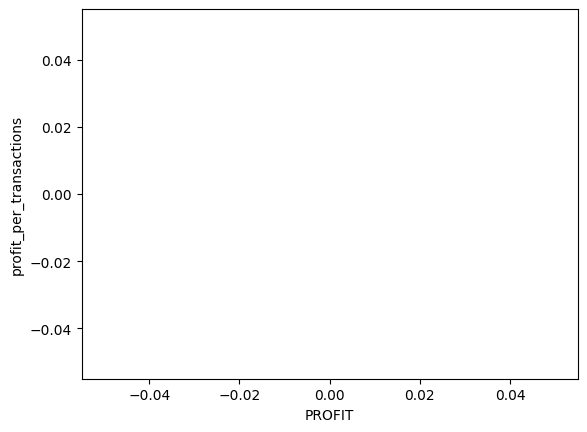

In [15]:
res1 = sn.kdeplot(final["PROFIT"], final["profit_per_transactions"])
plt.show()

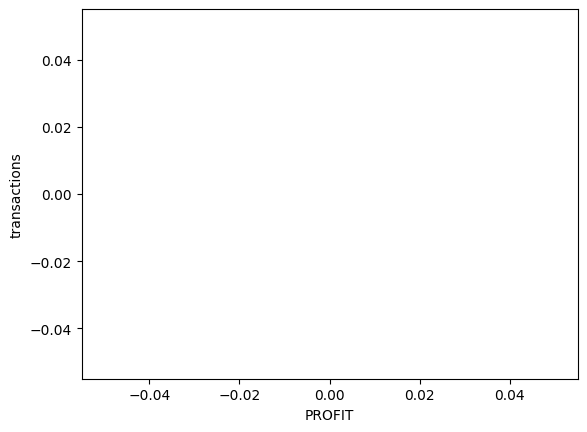

In [16]:
res2 = sn.kdeplot(final["PROFIT"], final["transactions"])
plt.show()

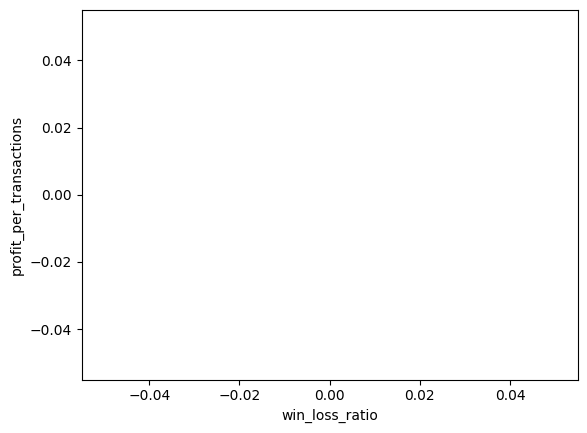

In [17]:
res2 = sn.kdeplot(final["win_loss_ratio"], final["profit_per_transactions"])
plt.show()

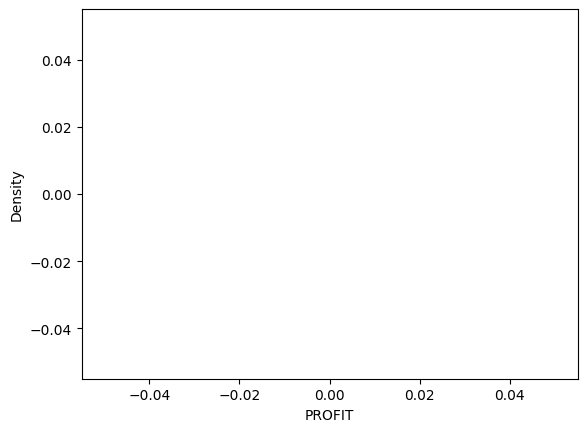

In [18]:
res3 = sn.kdeplot(final["PROFIT"])
plt.show()

In [ ]:
res4 = sn.kdeplot(final["profit_per_transactions"])
plt.show()

In [ ]:
res4 = sn.kdeplot(final["win_loss_ratio"])
plt.show()